# Problems for Computing Laboratory Using Python

## Problem statement 1
Determine the rms value of the current given by

\begin{align}
i(t) & = 5 \exp^{-1.25t}\sin(2 \pi t) \quad 0 \leq t \leq T/2 \\
i(t) & = 0 \quad T/2 \leq t \leq T 
\end{align}

Root Mean Square value of the current is defined as:
$$\sqrt{\frac{1}{T}\int_0^T i^2 dt}$$

For the above said case it is given by
$$\sqrt{\frac{1}{T}\int_0^{T/2} i^2 dt}$$

For Simpson's $\frac{1}{3}$ rule,

$$ I = (b-a) \frac{f(x_0) + 4 \sum_{i=1,3,5..}^{n-1} f(x_i) + 2 \sum_{j=2,4,6..}^{n-2}f(x_j) + f(x_n)}{3n}$$

As an example, let us find the definite integral of the following function: $f(x) = 0.2+25x-200x^2+675x^3-900x^4+400x^5$ from 0 to 0.8

In [16]:
from __future__ import division, print_function

import numpy as np
import scipy.integrate as sp

lo_limit = 0.0; up_limit = 0.8; n = 25; total = 0.0; z1 = 0.0; z2 = 0.0;
#
a = np.linspace(lo_limit, up_limit, n)
y = lambda x: 0.2 + (25 * x) - (200 * x**2) + (675 * x**3) - (900 * x**4) + (400 * x**5)
#a = np.linspace(0, 2*np.pi, n)
#y = lambda x: np.sin(x)
#y = lambda x: np.exp(-1.5*x)*sin(2*np.pi*x) ** 2
b = y(a)
for i in range(1, n, 2):
    z1 = z1 + 4 * b[i]
for i in range(2, n-1, 2):
    z2 = z2 + 2 * b[i]
total = b[0] + b[n-1] + z1 + z2
int_value = ((up_limit-lo_limit))*total/(3*(n-1))
print (int_value)
#Using Scipy.integrate module
int_value1 = sp.simps(b, a)
print(int_value1)

1.64052016461
1.64052016461


#Solution of Single order differential equation

### Problem statement 2
For a simple RL circuit, Kirchoff’s voltage law requires that

$$V = iR+L\frac{di}{dt}$$ with R = 1.5 $\Omega$, $L=1 H$, and $V=100$

$$\frac{di}{dt} = (100-iR)\frac{1}{L}$$

## Using Implicit Euler's Method



\begin{align}
i_{n+1} &= i_n+\frac{di_{n+1}}{dt} h \\
i_{n+1} &= i_n+\left(100-i_{n+1}R \right)\frac{h}{L} \\
i_{n+1}\left(1+\frac{R}{L}h\right) &= i_n+\frac{100 h}{L} \\
i_{n+1} &= \frac{i_n+\frac{100 h}{L}}{1+\frac{R}{L}h}
\end{align}

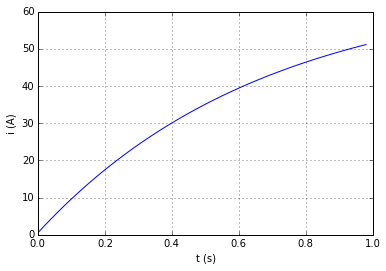

In [17]:
%matplotlib inline
from __future__ import division, print_function
#
import numpy as np
import matplotlib.pyplot as plt
#
ind = 1.0; res = 1.5; volt = 100.0; i0 = 0.5; 
ini_t = 0; final_t = 1.0; no = 51; t = ini_t
time = np.zeros(no, dtype=float); cur = np.zeros(no, dtype=float);
h = float((final_t-ini_t)/no)
# 
count = np.linspace(ini_t, final_t, no)
for i in range(len(count)):
    time[i] = t
    cur[i] = i0
    i1 = (i0 + (volt/ind) * h)/(1+(res/ind)*h)
    i0 = i1
    t = ini_t + (i+1) * h
#
plt.plot (time, cur)
plt.grid(True)
plt.xlabel('t (s)')
plt.ylabel('i (A)')
plt.show()

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


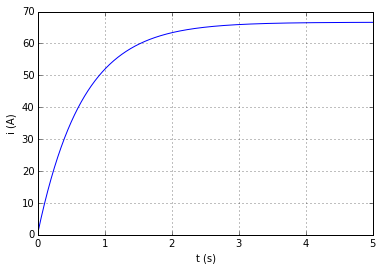

In [1]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def deriv(y, t):
    ydot = np.array(100-y[0]*1.5)
    return ydot

tstart = 0
tend = 5.0
numint = 1000
t = np.linspace(tstart, tend, numint+1)
yinit = np.array([0.5])
y = odeint(deriv, yinit, t)

plt.plot(t, y[:, 0])
plt.grid()
plt.xlabel('t (s)')
plt.ylabel('i (A)')
plt.show()